In [7]:
# First things first, we need to gather our data. Without data, we can't run tests or make observations.
# Let's first get the images of each of our pokemon. Ideally, we want our images to be uniform so that we reduce processing.
# serebii.net has the most consistent pokemon pictures. We'll grab our data from there.

# Import all the necessary tools needed for scraping
import time
import pandas as pd
import numpy as np
import random as random
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import urllib
import requests

In [2]:
# Need to download Chrome webdriver, then install it into PATH.
chrome_options = Options()
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36")

# if you can't install chromedriver into path, do this instead
# driver_path = '/Users/yourname/Desktop/foundations/chromedriver'
# driver = webdriver.Chrome(executable_path=driver_path)

driver = webdriver.Chrome(chrome_options = chrome_options)
# Remember to use the proper URL, aka with the https and stuff
# Navigate to where we want to start
driver.get("https://www.serebii.net/pokemon/bulbasaur/")

<ipython-input-2-6a94206d5cdb>:9: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options = chrome_options)


In [16]:
# Serebii is really only good for gathering images, so that's what we're going to do

# All images from Serebii
for i in range(898):
    # Add this just in case the page kicks out out for downloading too fast!
    time.sleep(random.randint(1,3))
    
    # First, locate the image on the page using find_element
    image_element = driver.find_element_by_xpath('//*[@class="fooinfo"]/img')

    # Get the link to the image
    image_link = image_element.get_attribute("src")

    # Download the image and save it with an appropriate name
    urllib.request.urlretrieve(image_link, f"{i+1}.png")

    # Move to the next page
    driver.find_element_by_xpath('//td[@width="right"]/../td[1]/a').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//td[@width="right"]/../td[1]/a"}
  (Session info: chrome=92.0.4515.107)


In [1]:
# We want to convert the PNG images to JPG.
from PIL import Image
import matplotlib.pyplot as plt


def get_image_png(image_path):
    image = Image.open(image_path + ".png")
    
    # Resizing the image removes a lot of the unusual alpha artefacts.
    image = image.resize((450,450))
    return image

image = get_image_png("892")
plt.imshow(image)
plt.axis("off")
plt.show()

In [60]:
# We want to convert the PNG images to JPG.
from PIL import Image
import matplotlib.pyplot as plt


def get_image_png(image_path):
    image = Image.open(image_path + ".png")
    
    # Resizing the image removes a lot of the unusual alpha artefacts.
    image = image.resize((450,450))
    return image

def png_to_jpg(image_path):
    image = get_image_png(image_path)
    image = image.convert("RGB")
    
#     # Get a white background instead of a black background
#     image = np.array(image)
#     mask = np.all(image == (0,0,0), axis = -1)
# #     rgb_mask = np.stack([mask, mask, mask], axis = 2)

#     image[mask] = [255, 255, 255]
    
#     # Convert back to image from array
#     image = Image.fromarray(image)
    
    # Note that this method does have a little problem with artefacts, but it's not terrible
    image.save(image_path + ".jpg")


for i in range(898):
    png_to_jpg(str(i+1))
    
# png_to_jpg("1")
# # image = get_image_png("1")
# # image = np.array(image)[:,:,:3]
# # print(image.shape)
# # plt.imshow(image)

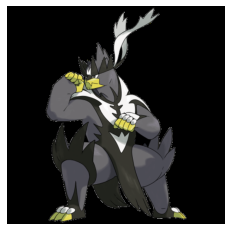

In [6]:
def png_to_jpg(image_path):
    image = get_image_png(image_path)
    image = image.convert("RGB")
    return image

plt.imshow(png_to_jpg("892"))
plt.axis("off")
plt.show()

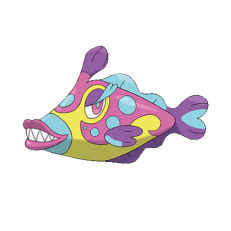

In [5]:
image = get_image_png("779")
image = image.convert("RGB")

# Numpy array of your image
image = np.array(image)

# mask = np.all(image < 4, axis = -1)
# Select for black pixels. Use axis -1 to specifically test the RGB part of the array.
# Remember that our array is organised as (width, height, RBG)
mask = np.all(image == (0,0,0), axis = -1)

# Stack our mask so that we have 
rgb_mask = np.stack([mask, mask, mask], axis = 2)

# Convert the all pixels that we identified as black to white.
image[mask] = [255, 255, 255]

plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
# # Use this if you want to download images!!
# # Download image
# import requests
# from io import StringIO

# for i in range(8):
#     # Find the location of the image
#     image_link = driver.find_element_by_xpath('//*[@rel="lightbox"]/img').get_attribute("src")


#     # r = requests.get(image_link)
#     # i = Image.open(StringIO(r.content))
#     # i.save("test_image.jpg")

#     # This works!
#     img_data = requests.get(image_link).content
#     with open(f'{i+891}.jpg', 'wb') as handler:
#         handler.write(img_data)
#     driver.find_element_by_xpath('//*[@class="entity-nav-next"]').click()